In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Обработка результатов

## **Изучение полученных результатов из УМ**

In [ ]:
def get_result(config:str,
               way_type:str,
               fault:str,
               speed:int,
               profile:str = "gost",
               force:str = "vertical") ->pd.DataFrame:
    """
    Получение результатов расчетов по ключевым словам
    1. `config` принимает два вида строк `empty` и `loaded`
    2. `way_type` принимает три вида строк `straight`, `curve_350` и `curve_650`
    3. `fault` принимает три вида строк `normal`, `polzun15`, `ellips10`
    4. `speed` от 10 до 60 км/ч
    5. `profile` есть профили `gost`, `newwagonw`, `greb_26`, `greb_30`, `greb_28`, `greb_24`
    """
    dictionary = {"curve_350":{20:55,
                               30:39,
                               40:28,
                               50:24,
                               60:19},
                }

    if force == "vertical":    
        if config == "empty":
            PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\Vertical force\\empty"
        
        elif config == "loaded":
            PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\Vertical force\\loaded"
    
    elif force == "side":
        if config == "empty":
            PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\Side force\\empty"
        
        elif config == "loaded":
            PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\Side force\\loaded"
    
        
    name = "\\"+config+"_"+way_type+"_"+fault+"_"+str(speed)+"_"+profile+".csv"

    l_name = len(name)

    FULL_PATH = PATH+name

    print(name)

    file = pd.read_csv(FULL_PATH,encoding='latin-1')

    COL_NAMES = ["time_step",name[1:l_name-4]]

    file.columns = COL_NAMES

    file = file.set_index("time_step")

    if config == "curve_350":
        file = file[file.index<dictionary["curve_350"][speed]]

    
    return file


In [ ]:
def get_profile_results(config:str,
                        way_type:str,
                        fault:str,
                        speed:int,
                        force:str = "vertical"):
    """Результаты расчета по всем видам профилей"""
    if force == "vertical":    
        file1 = get_result(config, way_type,fault,speed)
        file2 = get_result(config, way_type,fault,speed, "greb_26")
        file3 = get_result(config, way_type,fault,speed, "greb_28")
        file4 = get_result(config, way_type,fault,speed, "greb_30")
        file5 = get_result(config, way_type,fault,speed, "newwagonw")
        file6 = get_result(config, way_type,fault,speed, "greb_24")
    
    elif force =="side":
        file1 = get_result(config, way_type,fault,speed, force="side")
        file2 = get_result(config, way_type,fault,speed, "greb_26", force="side")
        file3 = get_result(config, way_type,fault,speed, "greb_28", force="side")
        file4 = get_result(config, way_type,fault,speed, "greb_30", force="side")
        file5 = get_result(config, way_type,fault,speed, "newwagonw", force="side")
        file6 = get_result(config, way_type,fault,speed, "greb_24", force="side")
    

    return file1,file2,file3,file4,file5, file6

In [ ]:
def plot_profile_results(config:str,way_type:str,fault:str,speed:int, force:str ="vertical"):
    """Создание графика сравнения результатов с разным профилем колес"""
    d={"loaded":"Груженый",
       "empty":"Порожний",
       "straight":"прямая",
       "curve_350":"кривая 350 м",
       "curve_650":"кривая 650 м",
       "normal":"без неисправностей",
       "polzun15":"ползун",
       "ellips10":"неравномерный прокат"}
    
   #  sns.set (rc={' axes.facecolor':'#C0C0C0', 'figure.facecolor':'#FFFFF0 '})
    
    files = get_profile_results(config, way_type,fault,speed, force=force)
    FILE = pd.concat(files,axis=1)
    FILE.columns = ["gost","greb_26","greb_28","greb_30","newwagonw","greb_24"]

    plt.figure(figsize=(12,8))
    plt.grid(True)
    sns.lineplot(FILE)
    plt.title(f"{d[config]} вагон, {d[way_type]}, {d[fault]}, скорость {speed} км/ч ")
    plt.xlabel("Время, с")
    if force == "vertical":
        plt.ylabel("Вертикальная сила, Н")
    elif force == "side":
        plt.ylabel("Боковая сила, Н")
    plt.show()
    



In [ ]:
plot_profile_results("loaded","curve_350","ellips10",60,force="side")

In [ ]:
def get_speed_results(config:str,
                      way_type:str,
                      fault:str,
                      profile:str = "gost",
                      force:str ="vertical") -> list[pd.DataFrame]:
    """Получение расчета сразу по всем скоростям"""
    speed = [i for i in range(10,130,10)]

    results = []

    for v in speed:
        if "curve" in way_type and v > 80:
            continue
        
        if force=="vertical":
            file = get_result(config,way_type,fault,profile=profile,speed=v,force=force)
            results.append(file)
            
        elif force=="side":
            file = get_result(config,way_type,fault,profile=profile,speed=v,force=force)
            results.append(file)

    return results

In [ ]:
get_speed_results("loaded","straight","normal","greb_24","vertical")

In [ ]:
from IPython.display import clear_output

wagon_cfg = ["empty","loaded"]
way_cfg = ["straight","curve_350","curve_650"]
wheel_cfg = ["gost", "greb_26","greb_28","greb_30","newwagonw", "greb_24"]
fault_cfg = ["normal","polzun15","ellips10"]

def get_full_calculations(wagon_cfg:list,
                          way_cfg:list,
                          wheel_cfg:list,
                          fault_cfg:list,
                          force:str = "vertical") -> dict:
    """Получение словаря со всеми расчетами"""
    gen_dict = {}
    

    for wagon in wagon_cfg:
        gen_dict[wagon] = {}
        for way in way_cfg:
            gen_dict[wagon][way] = {}
            for fault in fault_cfg:   
                gen_dict[wagon][way][fault] = {}
                for wheel in wheel_cfg:
                    clear_output(True)
                    print(f"{wagon}\n{way}\n{fault}\n{wheel}\n------")
                    gen_dict[wagon][way][fault][wheel] = get_speed_results(wagon,way,fault,wheel,force=force)
    
    return gen_dict

In [ ]:
ALL_CALCULATIONS_VERTICAL = get_full_calculations(wagon_cfg,way_cfg,wheel_cfg,fault_cfg,force="vertical")

In [ ]:
ALL_CALCULATIONS_SIDE = get_full_calculations(wagon_cfg,way_cfg,wheel_cfg,fault_cfg,force="side")

## **Подготовка инфы для разделения на кастомные фолды**

Так как колесо по ГОСТ имеет радиус 475 мм, то полный оборот колеса fold = 2*pi*475

Тогда время прохождения полного оборота колеса будет равно t = fold/v 

In [ ]:
def time_split(v:int) -> int:
    """Определение временного промежутка полного оборота колеса
    1. v - скорость движения поезда, км/ч
    """
    speed = v/3.6
    lenght = 2*np.pi*0.475
    t = lenght/speed
    return t

In [ ]:
plt.grid(True)
sns.lineplot(ALL_CALCULATIONS_VERTICAL["empty"]["straight"]["normal"]["gost"][0])
plt.show()

In [ ]:
def get_time_splits(data:pd.DataFrame) -> list:
    """Возвращает индексы по которым нужно производить обрез
    Индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    
    res = []

    start_point = 1.4

    time_max_point = data.index.max()               # Максимальное время

    if data.columns[0].split("_")[1] == "straight":
        col_name = data.columns[0].split("_")           # 10,20,30... км/ч
        wheel_rotate_num = time_split(int(col_name[3])) # 1.007 сек

    elif data.columns[0].split("_")[1] == "curve":
        col_name = data.columns[0].split("_")           # 10,20,30... км/ч
        wheel_rotate_num = time_split(int(col_name[4])) # 1.007 сек
        
    num_folds = (time_max_point-1)//wheel_rotate_num    # Сколько всего фолдов получится сделать

    res.append(start_point)

    for _ in range(int(num_folds)):
        start_point+= wheel_rotate_num
        res.append(start_point)

    return res

In [ ]:
def time_indexes(frames:list[pd.DataFrame]) -> dict:
    """Возвращает словарь индексов по которым нужно производить обрез, где
    индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    
    res = {}

    for n in range(len(frames)):
        str = frames[n].columns[0].split("_")
        for s in str:
            if s.isdigit():                        # тут нужно придумать исключение для толщины гребней
                if int(s) != 350 and int(s) != 650 and int(s) != 24:
                    name = s

                    res[name] = get_time_splits(frames[n])
    
    return res

In [ ]:
ALL_CALCULATIONS_VERTICAL["empty"]["straight"]["normal"]["greb_24"][1].columns

In [ ]:
time_indexes(ALL_CALCULATIONS_VERTICAL["empty"]["straight"]["normal"]["greb_24"])

In [ ]:
def get_all_time_indexes(calculations:dict[dict[dict[dict[list[pd.DataFrame]]]]]) -> dict:
    """Получение всех индексов времени по которым надо делить расчеты в виде словаря"""

    wagon_cfg = calculations.keys()
    way_cfg = calculations["empty"].keys()
    fault_cfg = calculations["empty"]["straight"].keys()
    wheel_cfg = calculations["empty"]["straight"]["normal"].keys()


    gen_dict = {}
    

    for wagon in wagon_cfg:
        gen_dict[wagon] = {}

        for way in way_cfg:
            gen_dict[wagon][way] = {}

            for fault in fault_cfg:   
                gen_dict[wagon][way][fault] = {}
                
                for wheel in wheel_cfg:
                    clear_output(True)
                    print(f"{wagon}\n{way}\n{fault}\n{wheel}\n------")
                    gen_dict[wagon][way][fault][wheel] = time_indexes(calculations[wagon][way][fault][wheel])
    
    return gen_dict

ALL_TIME_INDEXES = get_all_time_indexes(ALL_CALCULATIONS_VERTICAL)

In [ ]:
def get_splitted_dataframe(data:pd.DataFrame,indexes:list) -> pd.DataFrame:
    """Разделение одного результата расчета на несколько других по полному обороту колеса
    1. `data` - датафрейм с расчетом
    2. `indexes` - индексы по которым нужно делить расчет"""
    
    zeros = np.zeros((214,1))
    common_df = pd.DataFrame(zeros)

    for i in range(len(indexes)):
        if i < len(indexes) - 1:
            seq = data[(data.index>=indexes[i]) & (data.index<=indexes[i+1])]  # срез по точкам
        else:
            seq = data[data.index>indexes[i]]
        common_df = pd.concat([common_df,seq], axis=1)
    
    df = common_df.drop(0, axis=1)
    num_cols = len(df.columns)

    df.columns = [[data.columns[0] for i in range(num_cols)],[i for i in range(num_cols)]]
    
    return df       

In [ ]:
plt.figure().set_size_inches(12,8)
plt.grid(True)
sns.lineplot(ALL_CALCULATIONS_VERTICAL["loaded"]["straight"]["normal"]["gost"][1])
plt.title("Не разделенный расчет")
plt.ylabel("Вертикальная сила, Н")
plt.xlabel("Время, с")
plt.show()

**Пример разделения расчета на несколько мелких по обороту колеса**

In [ ]:
devided_result = get_splitted_dataframe(ALL_CALCULATIONS_VERTICAL["loaded"]["straight"]["normal"]["gost"][1],
                                       ALL_TIME_INDEXES["loaded"]["straight"]["normal"]["gost"]["20"])

devided_result_ = get_splitted_dataframe(ALL_CALCULATIONS_SIDE["loaded"]["straight"]["normal"]["gost"][1],
                                       ALL_TIME_INDEXES["loaded"]["straight"]["normal"]["gost"]["20"])

plt.figure().set_size_inches(12,8)
plt.grid(True)
plt.plot(devided_result)
plt.ylabel("Вертикальная сила, Н")
plt.xlabel("Время, с")
plt.title("Раздедение одного расчета по полному обороту колеса")
plt.xlim(0,5)
plt.ylim(0,225000)
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

def get_skew_kurt(data:pd.DataFrame) -> pd.DataFrame:
    """Получение дополнительных фичей для расчетов"""
    
    cols = data.columns

    skews = []
    kurtosises = []

    for i in cols:
        skew_ = skew(data[i].dropna().to_numpy())
        kurt_ = kurtosis(data[i].dropna().to_numpy())
        skews.append(skew_)
        kurtosises.append(kurt_)
    
    return pd.DataFrame({"skew":skews,"kurt":kurtosises}, index=cols).T

In [ ]:
def get_description(data:pd.DataFrame) -> pd.DataFrame:
    """Получаем описанный фрейм и к нему добавляем доп фичи"""
    
    summ = data.sum()
    variance = data.var()
    skew_kurt = get_skew_kurt(data)
    desc = data.describe()

    summ_var = pd.concat([variance,summ],axis=1).T
    summ_var.index = ["var","sum"]
   
    df = pd.concat([desc,summ_var,skew_kurt], axis=0)
    return df

In [ ]:
from IPython.display import clear_output

def make_frame_from_splits(calculations:dict,time_indexes:dict) -> pd.DataFrame:
    """Объединение всех разделенных расчетов на фолды и создание фичей"""
    
    wagon_cfg = calculations.keys()
    way_cfg = calculations["empty"].keys()
    fault_cfg = calculations["empty"]["straight"].keys()
    wheel_cfg = calculations["empty"]["straight"]["normal"].keys()
    speed_cfg = time_indexes["empty"]["straight"]["normal"]["gost"].keys()
    lenght = len(calculations["empty"]["straight"]["normal"]["gost"])
    
    zeros = np.zeros((1,12))
    common_df = pd.DataFrame(zeros)

    n = 0

    for wagon in wagon_cfg:
        for way in way_cfg:
            for fault in fault_cfg:
                for wheel in wheel_cfg:
                    for l,speed in zip(range(lenght),speed_cfg):
                        
                        if "curve" in way:
                            if l > 7 and int(speed) > 80:
                                continue
                        
                        splitted_df = get_splitted_dataframe(calculations[wagon][way][fault][wheel][l],
                                                            time_indexes[wagon][way][fault][wheel][speed])
                        
                        feats = get_description(splitted_df)

                        common_df = pd.concat([common_df,feats], axis=1)

                        clear_output(wait=True)
                        print(f"Сделано: {n}")
                        n+=1
                       
    
    df = common_df.drop(0, axis=0).drop(0,axis=1)

    return df                   

In [ ]:
# ЗАПУСТИТЬ ЭТИ ЯЧЕЙКИ

df_vertical = make_frame_from_splits(ALL_CALCULATIONS_VERTICAL,ALL_TIME_INDEXES)


In [ ]:
def make_pretty_df(data:pd.DataFrame, file_name:str, save:bool):
    df_ = data.copy()
    unvalid_cols = [i for i in range(1,12)]

    df_ = df_.drop(unvalid_cols,axis=1)     # Тут заменил df на df_

    new_cols = pd.MultiIndex.from_tuples(df_.columns)
    df_.columns = new_cols

    if save:
        df_.T.to_parquet(f"{file_name}")

    return df_.T

In [ ]:
# ЗАПУСТИТЬ ЭТИ ЯЧЕЙКИ, СОХРАНЕНИЕ УЖЕ ЕСТЬ В ФУНКЦИИ

DF_VERTICAL = make_pretty_df(df_vertical,"data_new_raw_vertical.parquet",True)


In [ ]:
df_side = make_frame_from_splits(ALL_CALCULATIONS_SIDE,ALL_TIME_INDEXES)
DF_SIDE = make_pretty_df(df_side,"data_new_raw_side.parquet",True)

# Подгрузка сохраненных результатов

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DF = df_
DF_SIDE = pd.read_parquet("data_new_raw_side.parquet")
DF_VERTICAL = pd.read_parquet("data_new_raw_vertical.parquet")

In [3]:
DF_SIDE.head()

25%         50%        75%  count  \
empty_straight_normal_10_gost 0 -11091.2945  -7695.0806 -5090.5459  215.0   
                              1 -11988.8725  -8809.9502 -6249.2637  215.0   
                              2 -14041.4210 -10742.7880 -7864.0198  215.0   
                              3 -12863.9020  -9595.0107 -6922.1643  215.0   
                              4 -12899.4970 -10761.9910 -8761.3857  215.0   

                                     kurt         max          mean  \
empty_straight_normal_10_gost 0 -0.233897  4572.97410  -7727.353586   
                              1 -0.960363 -2141.21260  -9108.305539   
                              2 -0.813141 -1299.67530 -11051.330162   
                              3 -0.622037   139.41061  -9705.199496   
                              4 -0.390614 -3988.28860 -11032.573618   

                                       min      skew          std  \
empty_straight_normal_10_gost 0 -16595.238  0.312691  4381.332844   
                              1 -16471.590 -0.236408  3683.999205   
                              2 -20610.469 -0.120031  3959.602067   
                              3 -19541.955  0.042085  3892.656564   
                              4 -18987.340 -0.260762  3119.499045   

                                          sum           var  
empty_straight_normal_10_gost 0 -1.661381e+06  1.919608e+07  
                              1 -1.958286e+06  1.357185e+07  
                              2 -2.376036e+06  1.567845e+07  
                              3 -2.086618e+06  1.515278e+07  
                              4 -2.372003e+06  9.731274e+06

In [4]:
DF_VERTICAL.head()

25%        50%         75%  count  \
empty_straight_normal_10_gost 0  126248.195  127004.93  127457.270  215.0   
                              1  127451.105  127666.25  128031.975  215.0   
                              2  127705.360  128518.85  130617.665  215.0   
                              3  126194.690  127737.66  128519.410  215.0   
                              4  126548.895  126879.16  127545.775  215.0   

                                     kurt        max           mean  \
empty_straight_normal_10_gost 0  0.712095  128489.06  126760.678000   
                              1 -0.154321  128716.65  127687.467349   
                              2 -1.200553  132194.30  129000.508791   
                              3 -0.551838  131944.66  127570.362279   
                              4  0.913185  129705.06  127062.812000   

                                       min      skew          std  \
empty_straight_normal_10_gost 0  123032.87 -0.803691   916.289112   
                              1  126435.99 -0.283763   439.892909   
                              2  126678.78  0.375457  1505.297634   
                              3  124110.58  0.091421  1621.369411   
                              4  125834.34  1.052079   714.953224   

                                         sum           var  
empty_straight_normal_10_gost 0  27253545.77  8.395857e+05  
                              1  27452805.48  1.935058e+05  
                              2  27735109.39  2.265921e+06  
                              3  27427627.89  2.628839e+06  
                              4  27318504.58  5.111581e+05

In [5]:
DF_VERTICAL.shape

(359544, 12)

In [6]:
def delete_unvalid_cols(data:pd.DataFrame) -> pd.DataFrame:
    """Удаление неликвидных колонок"""
    data_copy = data.T.copy()
    unvalid_cols = []

    for i in data_copy.columns:
        if data_copy[i].nunique() < 3:
            unvalid_cols.append(i)
    
    df = data_copy.drop(unvalid_cols, axis=1)

    return df.T


DF_SIDE = delete_unvalid_cols(DF_SIDE)
DF_VERTICAL = delete_unvalid_cols(DF_VERTICAL)

DF_VERTICAL.head(15)
# print(df.shape)

25%        50%         75%  count  \
empty_straight_normal_10_gost 0   126248.1950  127004.93  127457.270  215.0   
                              1   127451.1050  127666.25  128031.975  215.0   
                              2   127705.3600  128518.85  130617.665  215.0   
                              3   126194.6900  127737.66  128519.410  215.0   
                              4   126548.8950  126879.16  127545.775  215.0   
                              5   126508.6550  127269.22  128522.040  215.0   
                              6   127270.6550  131287.77  132180.030  215.0   
                              7   123335.9950  124113.06  124728.555  215.0   
                              8   122561.4125  124238.14  124826.245  214.0   
                              9   122923.5400  124045.73  125428.210  215.0   
                              10  121969.4700  122939.63  123993.310  215.0   
                              11  123485.2750  124511.16  126549.245  215.0   
                              12  125903.2350  127338.70  128225.595  215.0   
                              13  122365.2850  123283.09  123788.095  215.0   
                              14  123238.4100  124293.09  126030.575  215.0   

                                       kurt        max           mean  \
empty_straight_normal_10_gost 0    0.712095  128489.06  126760.678000   
                              1   -0.154321  128716.65  127687.467349   
                              2   -1.200553  132194.30  129000.508791   
                              3   -0.551838  131944.66  127570.362279   
                              4    0.913185  129705.06  127062.812000   
                              5   -0.424134  131159.64  127612.129488   
                              6   -0.917315  134591.02  130195.758093   
                              7    0.190340  127695.05  124161.085581   
                              8   -0.317501  128177.18  123816.053645   
                              9    6.953195  134962.42  124085.049907   
                              10   2.661525  129143.33  122891.310047   
                              11   1.966523  131474.67  124767.863302   
                              12   1.322861  130707.06  126896.269442   
                              13   0.017815  125005.11  123010.603395   
                              14  21.328424  133385.08  119873.574175   

                                           min      skew           std  \
empty_straight_normal_10_gost 0   123032.87000 -0.803691    916.289112   
                              1   126435.99000 -0.283763    439.892909   
                              2   126678.78000  0.375457   1505.297634   
                              3   124110.58000  0.091421   1621.369411   
                              4   125834.34000  1.052079    714.953224   
                              5   125634.27000  0.714055   1345.966395   
                              6   124305.92000 -0.573006   2765.339186   
                              7   121648.42000  0.594783   1204.612356   
                              8   119859.16000 -0.378228   1596.119046   
                              9   114752.05000  0.364874   2101.677845   
                              10  117129.39000  0.052280   1321.856338   
                              11  114270.15000 -0.740337   3248.966831   
                              12  119040.67000 -1.101457   2238.602534   
                              13  119567.49000 -0.708412   1074.399933   
                              14     585.20856 -4.800373  23522.432303   

                                           sum           var  
empty_straight_normal_10_gost 0   2.725355e+07  8.395857e+05  
                              1   2.745281e+07  1.935058e+05  
                              2   2.773511e+07  2.265921e+06  
                              3   2.742763e+07  2.628839e+06  
                              4   2.731850e+07  5.111581e+05  
                              5   2.743661e+0

# Пайплайн для обучения первой модельки 

*Предварительные результаты*

In [7]:
def new_str(value:str):
    """Замена строки типа `loaded_curve_650_normal_30_greb_30` на `loaded_curve650_normal_30_greb_30`"""

    if "curve" in value and "greb" in value:
        splitted = value.split("_")
        way_cfg = splitted[1]
        curve_m = splitted[2]
        new_word_1 = way_cfg+curve_m
        value = value.replace(curve_m,"")
        value = value.replace(way_cfg+"_",new_word_1)

        greb = splitted[5]
        greb_mm = splitted[6]
        new_word_2 = greb+greb_mm
        value = value.replace(greb_mm,"")
        value = value.replace(greb+"_",new_word_2)

        speed = splitted[4]

        if greb_mm == "30" and speed == "30":
            value = value.split("_")
            
            if "" in value:
                value.remove("")
            value.insert(3,"30")
            # print(value)
            value = "_".join(value)

    
    elif "curve" in value:
        splitted = value.split("_")
        way_cfg = splitted[1]
        curve_m = splitted[2]
        new_word_1 = way_cfg+curve_m
        value = value.replace(curve_m,"")
        value = value.replace(way_cfg+"_",new_word_1)

    return value

new_str("loaded_curve_650_normal_30_greb_30")

'loaded_curve650_normal_30_greb30'

In [8]:
DF_VERTICAL = DF_VERTICAL.reset_index().drop(["level_1"], axis=1)
DF_SIDE = DF_SIDE.reset_index().drop(["level_1"], axis=1)

DF_SIDE.head(15)

,level_0,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var
0,empty_straight_normal_10_gost,-11091.294500,-7695.080600,-5090.545900,215.0,-0.233897,4572.97410,-7727.353586,-16595.2380,0.312691,4381.332844,-1.661381e+06,1.919608e+07
1,empty_straight_normal_10_gost,-11988.872500,-8809.950200,-6249.263700,215.0,-0.960363,-2141.21260,-9108.305539,-16471.5900,-0.236408,3683.999205,-1.958286e+06,1.357185e+07
2,empty_straight_normal_10_gost,-14041.421000,-10742.788000,-7864.019800,215.0,-0.813141,-1299.67530,-11051.330162,-20610.4690,-0.120031,3959.602067,-2.376036e+06,1.567845e+07
3,empty_straight_normal_10_gost,-12863.902000,-9595.010700,-6922.164300,215.0,-0.622037,139.41061,-9705.199496,-19541.9550,0.042085,3892.656564,-2.086618e+06,1.515278e+07
4,empty_straight_normal_10_gost,-12899.497000,-10761.991000,-8761.385700,215.0,-0.390614,-3988.28860,-11032.573618,-18987.3400,-0.260762,3119.499045,-2.372003e+06,9.731274e+06
5,empty_straight_normal_10_gost,-13097.301000,-9830.884800,-7148.135500,215.0,-0.616993,479.65393,-10180.788116,-18235.9410,-0.209667,3782.509348,-2.188869e+06,1.430738e+07
6,empty_straight_normal_10_gost,-14894.045500,-10027.831000,-4936.648200,215.0,-0.681952,6537.62450,-9241.848777,-22350.4960,0.391245,6671.642927,-1.986997e+06,4.451082e+07
7,empty_straight_normal_10_gost,490.712815,3432.152300,6846.407250,215.0,-0.261675,15798.46100,3362.091030,-9454.7324,-0.255321,5057.532483,7.228496e+05,2.557863e+07
8,empty_straight_normal_10_gost,1020.031563,4875.159450,6794.652825,214.0,0.406558,12882.93200,3719.417329,-11208.3440,-0.894887,4586.887927,7.959553e+05,2.103954e+07
9,empty_straight_normal_10_gost,-6805.733650,-1971.752900,1704.244000,215.0,-0.533796,7790.15040,-2624.330083,-17222.5140,-0.440929,5197.746589,-5.642310e+05,2.701657e+07


In [9]:
DF_VERTICAL["level_0"] = DF_VERTICAL["level_0"].map(new_str)
DF_SIDE["level_0"] = DF_SIDE["level_0"].map(new_str)

In [10]:
DF_VERTICAL.head()

,level_0,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var
0,empty_straight_normal_10_gost,126248.195,127004.93,127457.270,215.0,0.712095,128489.06,126760.678000,123032.87,-0.803691,916.289112,27253545.77,8.395857e+05
1,empty_straight_normal_10_gost,127451.105,127666.25,128031.975,215.0,-0.154321,128716.65,127687.467349,126435.99,-0.283763,439.892909,27452805.48,1.935058e+05
2,empty_straight_normal_10_gost,127705.360,128518.85,130617.665,215.0,-1.200553,132194.30,129000.508791,126678.78,0.375457,1505.297634,27735109.39,2.265921e+06
3,empty_straight_normal_10_gost,126194.690,127737.66,128519.410,215.0,-0.551838,131944.66,127570.362279,124110.58,0.091421,1621.369411,27427627.89,2.628839e+06
4,empty_straight_normal_10_gost,126548.895,126879.16,127545.775,215.0,0.913185,129705.06,127062.812000,125834.34,1.052079,714.953224,27318504.58,5.111581e+05


In [11]:
new_cols = [f"new_col_{i}" for i in range(6)]

DF_VERTICAL[new_cols] = DF_VERTICAL['level_0'].str.split("_", expand=True)
DF_SIDE[new_cols] = DF_SIDE['level_0'].str.split("_", expand=True)

In [12]:
DF_SIDE.head()

,level_0,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var,new_col_0,new_col_1,new_col_2,new_col_3,new_col_4,new_col_5
0,empty_straight_normal_10_gost,-11091.2945,-7695.0806,-5090.5459,215.0,-0.233897,4572.97410,-7727.353586,-16595.238,0.312691,4381.332844,-1.661381e+06,1.919608e+07,empty,straight,normal,10,gost,None
1,empty_straight_normal_10_gost,-11988.8725,-8809.9502,-6249.2637,215.0,-0.960363,-2141.21260,-9108.305539,-16471.590,-0.236408,3683.999205,-1.958286e+06,1.357185e+07,empty,straight,normal,10,gost,None
2,empty_straight_normal_10_gost,-14041.4210,-10742.7880,-7864.0198,215.0,-0.813141,-1299.67530,-11051.330162,-20610.469,-0.120031,3959.602067,-2.376036e+06,1.567845e+07,empty,straight,normal,10,gost,None
3,empty_straight_normal_10_gost,-12863.9020,-9595.0107,-6922.1643,215.0,-0.622037,139.41061,-9705.199496,-19541.955,0.042085,3892.656564,-2.086618e+06,1.515278e+07,empty,straight,normal,10,gost,None
4,empty_straight_normal_10_gost,-12899.4970,-10761.9910,-8761.3857,215.0,-0.390614,-3988.28860,-11032.573618,-18987.340,-0.260762,3119.499045,-2.372003e+06,9.731274e+06,empty,straight,normal,10,gost,None


In [13]:
DF_VERTICAL = DF_VERTICAL.drop("level_0", axis=1)
DF_SIDE = DF_SIDE.drop("level_0", axis=1)
DF_SIDE.head()

,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var,new_col_0,new_col_1,new_col_2,new_col_3,new_col_4,new_col_5
0,-11091.2945,-7695.0806,-5090.5459,215.0,-0.233897,4572.97410,-7727.353586,-16595.238,0.312691,4381.332844,-1.661381e+06,1.919608e+07,empty,straight,normal,10,gost,None
1,-11988.8725,-8809.9502,-6249.2637,215.0,-0.960363,-2141.21260,-9108.305539,-16471.590,-0.236408,3683.999205,-1.958286e+06,1.357185e+07,empty,straight,normal,10,gost,None
2,-14041.4210,-10742.7880,-7864.0198,215.0,-0.813141,-1299.67530,-11051.330162,-20610.469,-0.120031,3959.602067,-2.376036e+06,1.567845e+07,empty,straight,normal,10,gost,None
3,-12863.9020,-9595.0107,-6922.1643,215.0,-0.622037,139.41061,-9705.199496,-19541.955,0.042085,3892.656564,-2.086618e+06,1.515278e+07,empty,straight,normal,10,gost,None
4,-12899.4970,-10761.9910,-8761.3857,215.0,-0.390614,-3988.28860,-11032.573618,-18987.340,-0.260762,3119.499045,-2.372003e+06,9.731274e+06,empty,straight,normal,10,gost,None


In [14]:
DF_VERTICAL = DF_VERTICAL.drop("new_col_5", axis=1)
DF_SIDE = DF_SIDE.drop("new_col_5", axis=1)
DF_SIDE.head()

,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var,new_col_0,new_col_1,new_col_2,new_col_3,new_col_4
0,-11091.2945,-7695.0806,-5090.5459,215.0,-0.233897,4572.97410,-7727.353586,-16595.238,0.312691,4381.332844,-1.661381e+06,1.919608e+07,empty,straight,normal,10,gost
1,-11988.8725,-8809.9502,-6249.2637,215.0,-0.960363,-2141.21260,-9108.305539,-16471.590,-0.236408,3683.999205,-1.958286e+06,1.357185e+07,empty,straight,normal,10,gost
2,-14041.4210,-10742.7880,-7864.0198,215.0,-0.813141,-1299.67530,-11051.330162,-20610.469,-0.120031,3959.602067,-2.376036e+06,1.567845e+07,empty,straight,normal,10,gost
3,-12863.9020,-9595.0107,-6922.1643,215.0,-0.622037,139.41061,-9705.199496,-19541.955,0.042085,3892.656564,-2.086618e+06,1.515278e+07,empty,straight,normal,10,gost
4,-12899.4970,-10761.9910,-8761.3857,215.0,-0.390614,-3988.28860,-11032.573618,-18987.340,-0.260762,3119.499045,-2.372003e+06,9.731274e+06,empty,straight,normal,10,gost


In [15]:
vertical_columns = ['25%', '50%', '75%', 'count', 'kurt', 'max', 'mean', 'min', 'skew','std', 'sum', 'var'] + ["wagon_cfg","way_cfg","target","speed","profile"]
side_columns = ['25%', '50%', '75%', 'count', 'kurt', 'max', 'mean', 'min', 'skew','std', 'sum', 'var'] + ["wagon_cfg","way_cfg","fault","speed","profile"]

DF_VERTICAL.columns=vertical_columns
DF_SIDE.columns=side_columns

DF_VERTICAL.head()

,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var,wagon_cfg,way_cfg,target,speed,profile
0,126248.195,127004.93,127457.270,215.0,0.712095,128489.06,126760.678000,123032.87,-0.803691,916.289112,27253545.77,8.395857e+05,empty,straight,normal,10,gost
1,127451.105,127666.25,128031.975,215.0,-0.154321,128716.65,127687.467349,126435.99,-0.283763,439.892909,27452805.48,1.935058e+05,empty,straight,normal,10,gost
2,127705.360,128518.85,130617.665,215.0,-1.200553,132194.30,129000.508791,126678.78,0.375457,1505.297634,27735109.39,2.265921e+06,empty,straight,normal,10,gost
3,126194.690,127737.66,128519.410,215.0,-0.551838,131944.66,127570.362279,124110.58,0.091421,1621.369411,27427627.89,2.628839e+06,empty,straight,normal,10,gost
4,126548.895,126879.16,127545.775,215.0,0.913185,129705.06,127062.812000,125834.34,1.052079,714.953224,27318504.58,5.111581e+05,empty,straight,normal,10,gost


In [16]:
DF_SIDE.head()

,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var,wagon_cfg,way_cfg,fault,speed,profile
0,-11091.2945,-7695.0806,-5090.5459,215.0,-0.233897,4572.97410,-7727.353586,-16595.238,0.312691,4381.332844,-1.661381e+06,1.919608e+07,empty,straight,normal,10,gost
1,-11988.8725,-8809.9502,-6249.2637,215.0,-0.960363,-2141.21260,-9108.305539,-16471.590,-0.236408,3683.999205,-1.958286e+06,1.357185e+07,empty,straight,normal,10,gost
2,-14041.4210,-10742.7880,-7864.0198,215.0,-0.813141,-1299.67530,-11051.330162,-20610.469,-0.120031,3959.602067,-2.376036e+06,1.567845e+07,empty,straight,normal,10,gost
3,-12863.9020,-9595.0107,-6922.1643,215.0,-0.622037,139.41061,-9705.199496,-19541.955,0.042085,3892.656564,-2.086618e+06,1.515278e+07,empty,straight,normal,10,gost
4,-12899.4970,-10761.9910,-8761.3857,215.0,-0.390614,-3988.28860,-11032.573618,-18987.340,-0.260762,3119.499045,-2.372003e+06,9.731274e+06,empty,straight,normal,10,gost


In [17]:
DF_VERTICAL = pd.get_dummies(DF_VERTICAL,columns=["wagon_cfg","way_cfg"],drop_first=True)
DF_SIDE = pd.get_dummies(DF_SIDE,columns=["wagon_cfg","way_cfg"],drop_first=True).drop("fault",axis=1)

In [18]:
DF_SIDE.head()

,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var,speed,profile,wagon_cfg_loaded,way_cfg_curve650,way_cfg_straight
0,-11091.2945,-7695.0806,-5090.5459,215.0,-0.233897,4572.97410,-7727.353586,-16595.238,0.312691,4381.332844,-1.661381e+06,1.919608e+07,10,gost,0,0,1
1,-11988.8725,-8809.9502,-6249.2637,215.0,-0.960363,-2141.21260,-9108.305539,-16471.590,-0.236408,3683.999205,-1.958286e+06,1.357185e+07,10,gost,0,0,1
2,-14041.4210,-10742.7880,-7864.0198,215.0,-0.813141,-1299.67530,-11051.330162,-20610.469,-0.120031,3959.602067,-2.376036e+06,1.567845e+07,10,gost,0,0,1
3,-12863.9020,-9595.0107,-6922.1643,215.0,-0.622037,139.41061,-9705.199496,-19541.955,0.042085,3892.656564,-2.086618e+06,1.515278e+07,10,gost,0,0,1
4,-12899.4970,-10761.9910,-8761.3857,215.0,-0.390614,-3988.28860,-11032.573618,-18987.340,-0.260762,3119.499045,-2.372003e+06,9.731274e+06,10,gost,0,0,1


In [19]:
DF_VERTICAL["speed"] = DF_VERTICAL["speed"].astype(int)
DF_SIDE["speed"] = DF_SIDE["speed"].astype(int)

In [20]:
DF_VERTICAL.columns

Index(['25%', '50%', '75%', 'count', 'kurt', 'max', 'mean', 'min', 'skew',
       'std', 'sum', 'var', 'target', 'speed', 'profile', 'wagon_cfg_loaded',
       'way_cfg_curve650', 'way_cfg_straight'],
      dtype='object')

In [21]:
DF_SIDE["profile"] = DF_SIDE["profile"].replace("greb","greb26")
DF_VERTICAL["profile"] = DF_VERTICAL["profile"].replace("greb","greb26")

In [22]:
DF_VERTICAL["profile"].unique()

array(['gost', 'greb26', 'newwagonw', 'greb28', 'greb30', 'greb24'],
      dtype=object)

In [23]:
DF_SIDE.shape

(357604, 17)

In [24]:
def binarize_target(string:str):
    if (string == "normal"
        or string == "newwagonw"
        or string == "gost"
        or string == "greb30"
        or string == "greb28"):
        return 0
    else:
        return 1

def encode_target(string:str):
    
    if (string == "normal"
        or string == "newwagonw"
        or string == "gost"):

        return int(0)
        
    elif (string == "polzun15"
          or string == "greb28"
          or string == "greb30"):
        
        return int(1)
    
    elif (string == "ellips10"
          or string == "greb26"
          or string == "greb24"):
        
        return int(2)

## Encoding таргета

In [25]:
DF_VERTICAL["target"] = DF_VERTICAL["target"].map(encode_target)
DF_SIDE["profile"] = DF_SIDE["profile"].map(encode_target)
DF_SIDE.head()

,25%,50%,75%,count,kurt,max,mean,min,skew,std,sum,var,speed,profile,wagon_cfg_loaded,way_cfg_curve650,way_cfg_straight
0,-11091.2945,-7695.0806,-5090.5459,215.0,-0.233897,4572.97410,-7727.353586,-16595.238,0.312691,4381.332844,-1.661381e+06,1.919608e+07,10,0,0,0,1
1,-11988.8725,-8809.9502,-6249.2637,215.0,-0.960363,-2141.21260,-9108.305539,-16471.590,-0.236408,3683.999205,-1.958286e+06,1.357185e+07,10,0,0,0,1
2,-14041.4210,-10742.7880,-7864.0198,215.0,-0.813141,-1299.67530,-11051.330162,-20610.469,-0.120031,3959.602067,-2.376036e+06,1.567845e+07,10,0,0,0,1
3,-12863.9020,-9595.0107,-6922.1643,215.0,-0.622037,139.41061,-9705.199496,-19541.955,0.042085,3892.656564,-2.086618e+06,1.515278e+07,10,0,0,0,1
4,-12899.4970,-10761.9910,-8761.3857,215.0,-0.390614,-3988.28860,-11032.573618,-18987.340,-0.260762,3119.499045,-2.372003e+06,9.731274e+06,10,0,0,0,1


In [27]:
def set_tuple_cols(df:pd.DataFrame,prefix:str) -> pd.DataFrame:
    
    df_ = df.copy()
    cols = []

    for i in df_.columns:
        cols.append((f"{prefix}",i))
    
    multicols = pd.MultiIndex.from_tuples(cols)

    df_.columns = multicols
    return df_

In [28]:
DF_VERTICAL = set_tuple_cols(DF_VERTICAL,"Vertical force")
DF_SIDE = set_tuple_cols(DF_SIDE,"Side force")

In [29]:
DF_VERTICAL.shape

(357544, 18)

In [30]:
DF_SIDE.shape

(357604, 17)

In [31]:
DF = pd.concat([DF_VERTICAL,DF_SIDE],axis=1)
DF.head()

Vertical force                                                     \
             25%        50%         75%  count      kurt        max   
0     126248.195  127004.93  127457.270  215.0  0.712095  128489.06   
1     127451.105  127666.25  128031.975  215.0 -0.154321  128716.65   
2     127705.360  128518.85  130617.665  215.0 -1.200553  132194.30   
3     126194.690  127737.66  128519.410  215.0 -0.551838  131944.66   
4     126548.895  126879.16  127545.775  215.0  0.913185  129705.06   

                                                    ... Side force            \
            mean        min      skew          std  ...        min      skew   
0  126760.678000  123032.87 -0.803691   916.289112  ... -16595.238  0.312691   
1  127687.467349  126435.99 -0.283763   439.892909  ... -16471.590 -0.236408   
2  129000.508791  126678.78  0.375457  1505.297634  ... -20610.469 -0.120031   
3  127570.362279  124110.58  0.091421  1621.369411  ... -19541.955  0.042085   
4  127062.812000  125834.34  1.052079   714.953224  ... -18987.340 -0.260762   

                                                                           \
           std           sum           var speed profile wagon_cfg_loaded   
0  4381.332844 -1.661381e+06  1.919608e+07    10       0                0   
1  3683.999205 -1.958286e+06  1.357185e+07    10       0                0   
2  3959.602067 -2.376036e+06  1.567845e+07    10       0                0   
3  3892.656564 -2.086618e+06  1.515278e+07    10       0                0   
4  3119.499045 -2.372003e+06  9.731274e+06    10       0                0   

                                     
  way_cfg_curve650 way_cfg_straight  
0                0                1  
1                0                1  
2                0                1  
3                0                1  
4                0                1  

[5 rows x 35 columns]

In [32]:
DF.columns

MultiIndex([('Vertical force',              '25%'),
            ('Vertical force',              '50%'),
            ('Vertical force',              '75%'),
            ('Vertical force',            'count'),
            ('Vertical force',             'kurt'),
            ('Vertical force',              'max'),
            ('Vertical force',             'mean'),
            ('Vertical force',              'min'),
            ('Vertical force',             'skew'),
            ('Vertical force',              'std'),
            ('Vertical force',              'sum'),
            ('Vertical force',              'var'),
            ('Vertical force',           'target'),
            ('Vertical force',            'speed'),
            ('Vertical force',          'profile'),
            ('Vertical force', 'wagon_cfg_loaded'),
            ('Vertical force', 'way_cfg_curve650'),
            ('Vertical force', 'way_cfg_straight'),
            (    'Side force',              '25%'),
            

In [33]:
DF.shape

(357604, 35)

In [38]:
DF = DF.dropna(axis=0)

In [39]:
DF = DF.drop([('Side force', 'way_cfg_straight'),
              ('Side force', 'way_cfg_curve650'),
              ('Side force', 'wagon_cfg_loaded'),
              ('Vertical force', 'profile'),
              (    'Side force', 'speed')],axis=1)

# Матрицы корреляций

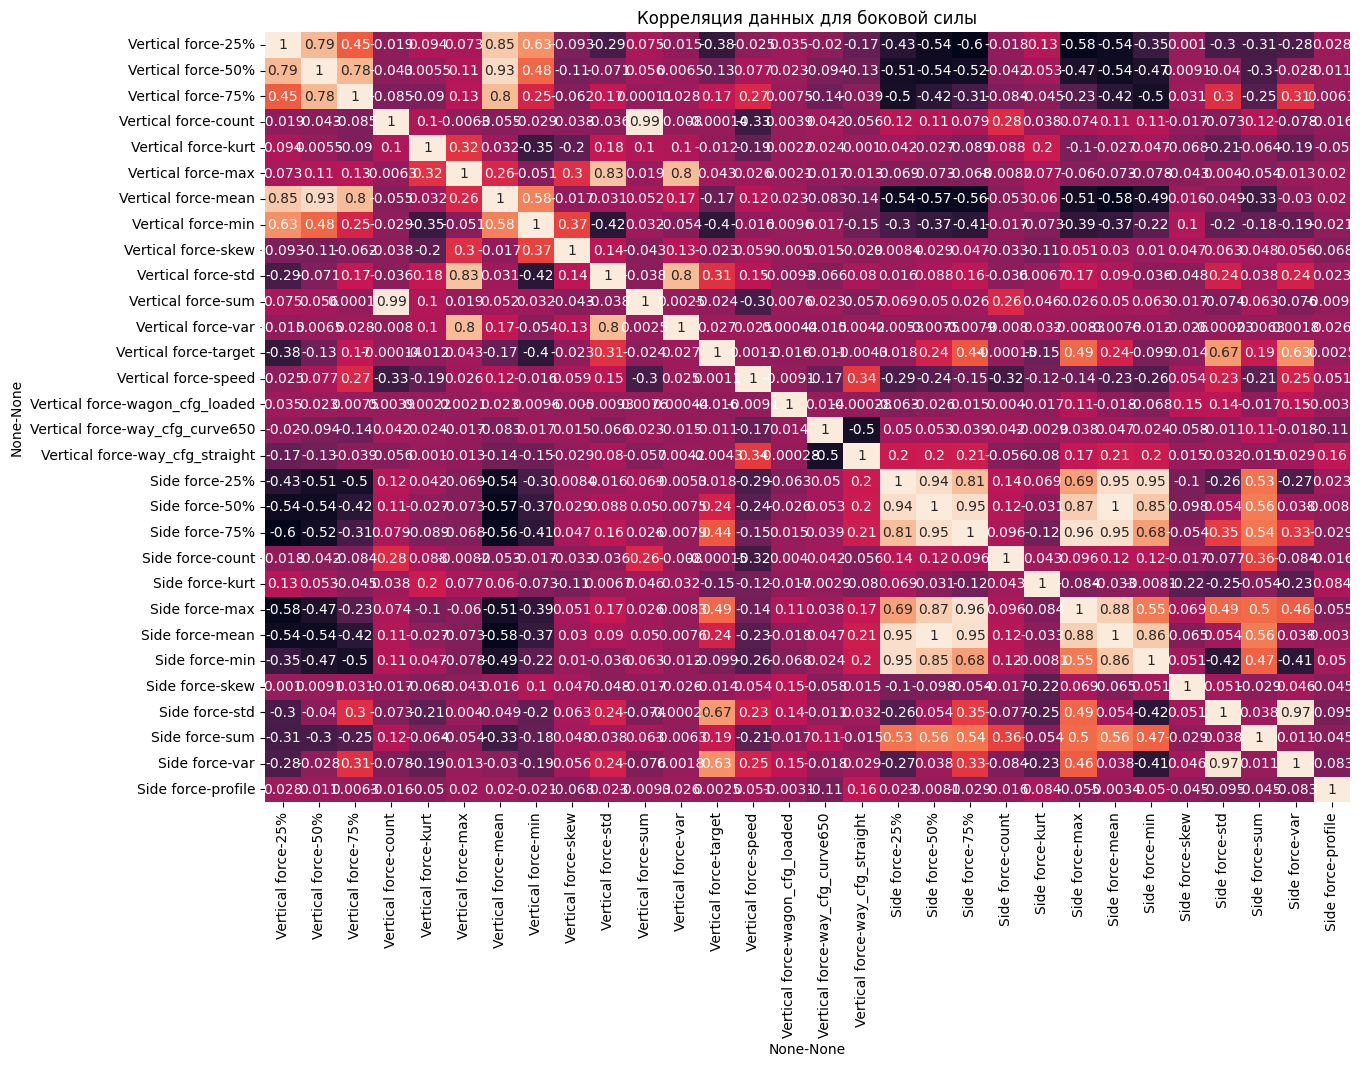

In [40]:
plt.figure().set_size_inches(14,10)
plt.title("Корреляция данных для боковой силы")
sns.heatmap(DF.corr("pearson"),annot=True,cbar=False)
plt.show()

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

def save_results(estimator,X_test,y_test,model_type:str,addition:str):
    
    ave = "micro"
    y_pred = estimator.predict(X_test)
    presicion = precision_score(y_test,y_pred,average=ave)
    recall = recall_score(y_test,y_pred,average=ave)
    f1_ = f1_score(y_test,y_pred,average=ave)

    df = pd.read_csv("stat_results.csv")

    shape = X_test.shape[0]
    

    line = pd.DataFrame({"model":[model_type],
                         "step1":[estimator.steps[0][0]],
                         "step2":[estimator.steps[1][0]],
                         "test_size":[shape],
                         "presicion":[presicion],
                         "recall":[recall],
                         "f1_score":[f1_],
                         "addition":[addition]})
    
    updated_stats = pd.concat([df,line],axis=0).drop("Unnamed: 0",axis=1).to_csv("stat_results.csv")

    return updated_stats

# Обучение моделей диагностирования неисправностей

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
np.random.seed(32)

In [43]:
X = DF.drop([('Vertical force', '50%'),
             ('Vertical force','mean'),
             ('Vertical force', "sum"),
             ('Vertical force', "count"),
             ("Side force", "count"),
             ("Side force", "sum"),
             ("Side force", "max"),
             ("Side force", "min"),
             ("Side force", "var"),
             ("Side force", "profile")],axis=1)

y = DF[('Vertical force',"target")]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

## XGBoost

In [45]:
n_estim = 100

xgb_pipe = Pipeline([("StandardScaler",StandardScaler()),("XGBClassifier",XGBClassifier(n_estimators=n_estim))])

xgb_pipe.fit(X_train,y_train)

save_results(xgb_pipe,X_test,y_test,model_type="vertical",addition=f"n_estim: {n_estim}")

print(classification_report(y_test,xgb_pipe.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23473
         1.0       1.00      1.00      1.00     24725
         2.0       1.00      1.00      1.00     23311

    accuracy                           1.00     71509
   macro avg       1.00      1.00      1.00     71509
weighted avg       1.00      1.00      1.00     71509



In [46]:
import catboost
import lightgbm
import xgboost
import sklearn

def plot_feature_importance(estimator):
    
    if type(estimator[1]) == xgboost.sklearn.XGBClassifier:
        coefs = estimator[1].coef_

    elif type(estimator[1]) == catboost.core.CatBoostClassifier or lightgbm.sklearn.LGBMClassifier:
        coefs = estimator[1].feature_importances_

    elif type(estimator[1]) == sklearn.linear_model._coordinate_descent.Lasso:
        coefs = estimator[1].coef_
        
    if coefs.shape[0] == 3:
        d = {0:"исправного колеса",
             1:"ползуна",
             2:"неравномерного проката"}
        
    elif coefs.shape[0] == 2:
        d = {0:"исправного вагона",
             1:"неисправного вагона"}
    
    elif len(coefs.shape) == 1:
        d = {0:"модели Catboost"}
    
    if len(coefs) <= 3:
        for i in range(len(coefs)):
            df = pd.DataFrame(coefs[i]).T
            df.columns = estimator[:-1].get_feature_names_out()
            df.index = ["Степень важности"]
            plt.figure().set_size_inches(12,2)
            plt.title(f"Коэффициенты важности признаков для предсказания {d[i]}")
            sns.barplot(abs(df))
            plt.xticks(rotation=45)
            plt.show()
        
    elif len(coefs.shape) == 1:
        df = pd.DataFrame(coefs).T
        df.columns = estimator[:-1].get_feature_names_out()
        df.index = ["Степень важности"]
        plt.figure().set_size_inches(12,2)
        plt.title(f"Коэффициенты важности признаков для предсказания неисправностей {d[0]}")
        sns.barplot(abs(df))
        plt.xticks(rotation=45)
        plt.show()

    else:
        print(len(coefs))

In [47]:
plot_feature_importance(xgb_pipe)

AttributeError: Coefficients are not defined for Booster type None

## Catboost

In [48]:
from catboost import CatBoostClassifier

cat_pipe = Pipeline([("StandardScaler",StandardScaler()),("CatBoostClassifier",CatBoostClassifier(iterations=1000))])

cat_pipe.fit(X_train,y_train)


Learning rate set to 0.105585
0:	learn: 0.8991972	total: 190ms	remaining: 3m 9s
1:	learn: 0.7536775	total: 238ms	remaining: 1m 58s
2:	learn: 0.6413119	total: 290ms	remaining: 1m 36s
3:	learn: 0.5514210	total: 337ms	remaining: 1m 23s
4:	learn: 0.4778129	total: 371ms	remaining: 1m 13s
5:	learn: 0.4165730	total: 414ms	remaining: 1m 8s
6:	learn: 0.3648762	total: 463ms	remaining: 1m 5s
7:	learn: 0.3207923	total: 495ms	remaining: 1m 1s
8:	learn: 0.2829583	total: 535ms	remaining: 58.9s
9:	learn: 0.2502519	total: 576ms	remaining: 57s
10:	learn: 0.2218008	total: 618ms	remaining: 55.5s
11:	learn: 0.1969625	total: 660ms	remaining: 54.4s
12:	learn: 0.1751849	total: 707ms	remaining: 53.6s
13:	learn: 0.1560285	total: 759ms	remaining: 53.5s
14:	learn: 0.1391500	total: 803ms	remaining: 52.7s
15:	learn: 0.1242205	total: 851ms	remaining: 52.3s
16:	learn: 0.1109907	total: 900ms	remaining: 52s
17:	learn: 0.0992498	total: 947ms	remaining: 51.7s
18:	learn: 0.0888158	total: 994ms	remaining: 51.3s
19:	learn: 

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('CatBoostClassifier',
                 <catboost.core.CatBoostClassifier object at 0x0000026AFA019B90>)])

In [49]:
print(classification_report(y_test,cat_pipe.predict(X_test)))

save_results(cat_pipe,X_test,y_test,model_type="vertical",addition="default settings")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23473
         1.0       1.00      1.00      1.00     24725
         2.0       1.00      1.00      1.00     23311

    accuracy                           1.00     71509
   macro avg       1.00      1.00      1.00     71509
weighted avg       1.00      1.00      1.00     71509



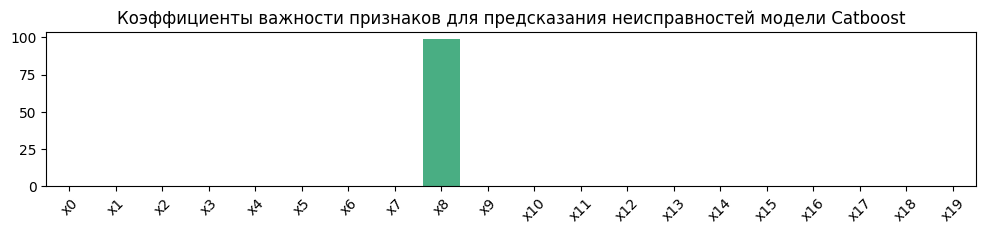

In [50]:
plot_feature_importance(cat_pipe)

## LightGBM

In [51]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import Normalizer

lgbm_pipe = Pipeline([("StandardScaler",StandardScaler()),("LGBMClassifier",LGBMClassifier())])

lgbm_pipe.fit(X_train,y_train)

print(classification_report(y_test,lgbm_pipe.predict(X_test)))

save_results(lgbm_pipe,X_test,y_test,model_type="vertical",addition="default settings")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3851
[LightGBM] [Info] Number of data points in the train set: 286035, number of used features: 20
[LightGBM] [Info] Start training from score -1.123794
[LightGBM] [Info] Start training from score -1.058422
[LightGBM] [Info] Start training from score -1.114885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

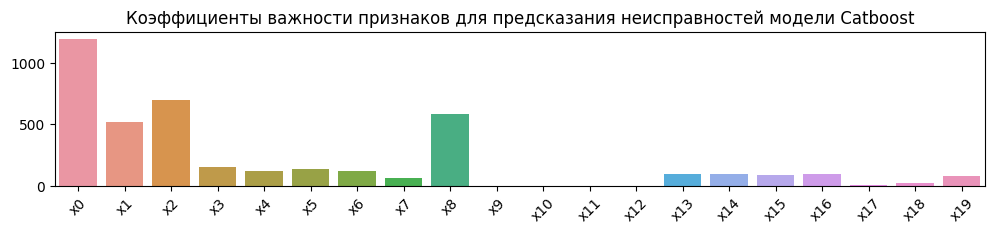

In [52]:
plot_feature_importance(lgbm_pipe)

## Сводка результатов

In [53]:
def show_stat_results():
    data = pd.read_csv("stat_results.csv")
    columns = data.columns

    cols_to_drop = []

    if "Unnamed: 0" in columns:
        print("in")
        for c in columns:
            if "Unnamed" in c:
                cols_to_drop.append(c)
        # print(cols_to_drop)
        return data.drop(cols_to_drop,axis=1)
    
    elif "Unnamed: 0" not in columns:
        return data

show_stat_results()

in


,step1,step2,presicion,recall,f1_score,test_size,model,addition
0,StandardScaler,CatBoostClassifier,0.924394,0.924394,0.924394,36743.0,NaN,NaN
1,StandartScaler,LGBMClassifier,0.923577,0.923577,0.923577,36743.0,NaN,NaN
2,StandardScaler,XGBClassifier,0.895273,0.895273,0.895273,36743.0,NaN,NaN
3,Normalizer,LGBMClassifier,0.913997,0.913997,0.913997,36743.0,NaN,NaN
4,StandardScaler,LGBMClassifier,0.923577,0.923577,0.923577,36743.0,NaN,NaN
...,...,...,...,...,...,...,...,...
77,StandardScaler,CatBoostClassifier,0.693614,0.693614,0.693614,71521.0,side,"lr:0.05,iter:1000,depth:5"
78,StandardScaler,XGBClassifier,1.000000,1.000000,1.000000,71509.0,vertical,n_estim: 1000
79,StandardScaler,XGBClassifier,1.000000,1.000000,1.000000,71509.0,vertical,n_estim: 100
80,StandardScaler,CatBoostClassifier,1.000000,1.000000,1.000000,71509.0,vertical,default settings


## AUC_ROC

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=cat_pipe.predict_proba(X_test)[:,1])

auc_roc = roc_auc_score(y_true=y_test,y_score=cat_pipe.predict(X_test))

display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc_roc, estimator_name="Classifier")

display.plot()
plt.show()

In [ ]:
fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=xgb_pipe.predict_proba(X_test)[:,1])

auc_roc = roc_auc_score(y_true=y_test,y_score=xgb_pipe.predict(X_test))

display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc_roc, estimator_name="XGB Classifier")

display.plot()
plt.show()

**PCA TSNE**

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)

X_embedded

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf = XGBClassifier()


# Loading some example data

# print(X)
# print(y)

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure().set_size_inches(12,8)

labels = ['Предсказания модели XGboost']
          

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_embedded, y)
    
    # ax = plt.subplot(gs[grd[0], grd[1]])
    plt.plot(grd[0],grd[1])
    fig = plot_decision_regions(X=X_embedded, y=y.to_numpy(),
                                clf=clf, legend=1)
    plt.title(lab)

plt.show()

# Обучение моделей для диагностирования толщины гребней

In [54]:
from sklearn.model_selection import train_test_split

X_ = DF.drop([('Vertical force', '50%'),
             ('Vertical force','mean'),
             ('Vertical force', "sum"),
             ('Vertical force', "count"),
             ("Side force", "count"),
             ("Side force", "sum"),
             ("Side force", "max"),
             ("Side force", "min"),
             ("Side force", "var"),
             ("Vertical force", "target")],axis=1)

y_ = DF[("Side force", "profile")]

X_train_,X_test_,y_train_,y_test_ = train_test_split(X_,y_,test_size=0.2,shuffle=True)

## XGboost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23570
           1       1.00      1.00      1.00     13057
           2       1.00      1.00      1.00     34882

    accuracy                           1.00     71509
   macro avg       1.00      1.00      1.00     71509
weighted avg       1.00      1.00      1.00     71509



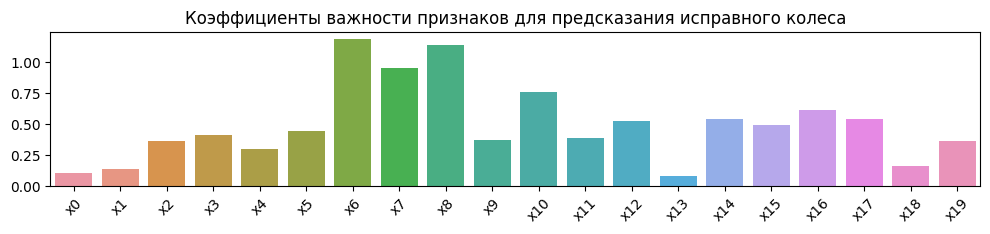

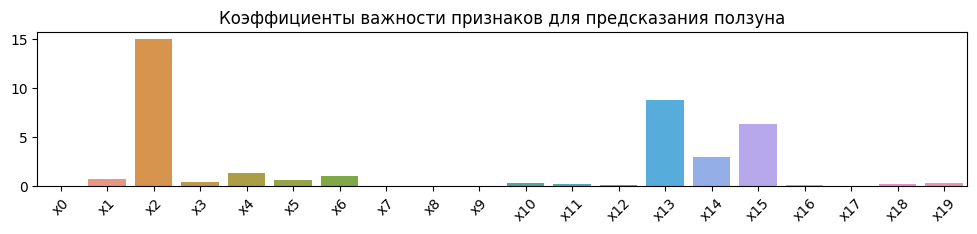

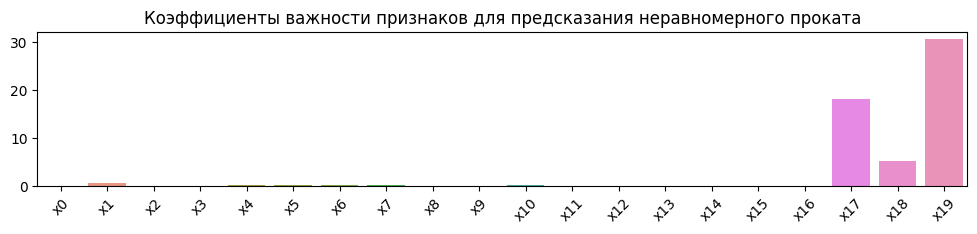

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

profile_xgb_pipe = Pipeline([("StandardScaler",StandardScaler()),("XGBClassifier",XGBClassifier(n_estimators=100,booster="gblinear"))])
profile_xgb_pipe.fit(X_train_,y_train_)

print(classification_report(y_test_, profile_xgb_pipe.predict(X_test_)))

plot_feature_importance(profile_xgb_pipe)

save_results(profile_xgb_pipe,X_test_,y_test_,model_type="side",addition="n_estimators=500")

## Catboost

0:	learn: 0.0949486	total: 34.9ms	remaining: 17.4s
1:	learn: 0.0326477	total: 66.5ms	remaining: 16.6s
2:	learn: 0.0117546	total: 97.6ms	remaining: 16.2s
3:	learn: 0.0043051	total: 132ms	remaining: 16.4s
4:	learn: 0.0015908	total: 165ms	remaining: 16.4s
5:	learn: 0.0005969	total: 200ms	remaining: 16.4s
6:	learn: 0.0002332	total: 233ms	remaining: 16.4s
7:	learn: 0.0000984	total: 267ms	remaining: 16.4s
8:	learn: 0.0000473	total: 302ms	remaining: 16.5s
9:	learn: 0.0000268	total: 337ms	remaining: 16.5s
10:	learn: 0.0000176	total: 370ms	remaining: 16.4s
11:	learn: 0.0000128	total: 403ms	remaining: 16.4s
12:	learn: 0.0000100	total: 434ms	remaining: 16.3s
13:	learn: 0.0000082	total: 463ms	remaining: 16.1s
14:	learn: 0.0000069	total: 493ms	remaining: 16s
15:	learn: 0.0000060	total: 524ms	remaining: 15.8s
16:	learn: 0.0000053	total: 555ms	remaining: 15.8s
17:	learn: 0.0000047	total: 586ms	remaining: 15.7s
18:	learn: 0.0000042	total: 619ms	remaining: 15.7s
19:	learn: 0.0000039	total: 651ms	remain

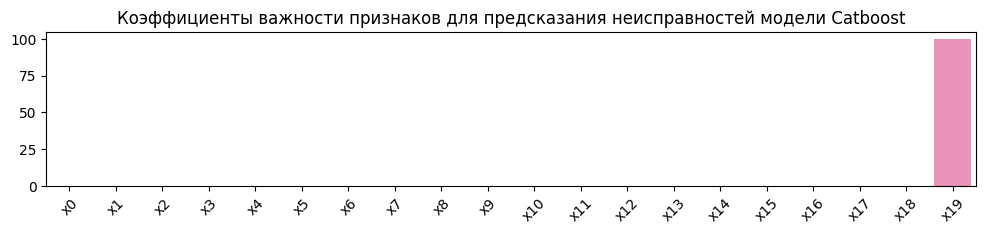

In [56]:
learning_rate = 1.0
iterations = 500
depth = 3

profile_cat_pipe = Pipeline([("StandardScaler",StandardScaler()),("CatBoostClassifier",CatBoostClassifier(learning_rate = learning_rate,
                                                                                                           iterations = iterations,
                                                                                                             depth = depth))])

profile_cat_pipe.fit(X_train_,y_train_)

print(classification_report(y_test_, profile_cat_pipe.predict(X_test_)))

plot_feature_importance(profile_cat_pipe)

save_results(profile_cat_pipe,X_test_,y_test_,model_type="side",addition=f"lr:{learning_rate},iter:{iterations},depth:{depth}")

In [57]:
print(classification_report(y_test_, profile_cat_pipe.predict(X_test_)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23570
           1       1.00      1.00      1.00     13057
           2       1.00      1.00      1.00     34882

    accuracy                           1.00     71509
   macro avg       1.00      1.00      1.00     71509
weighted avg       1.00      1.00      1.00     71509



## LightGBM

In [58]:
profile_lgbm_pipe = Pipeline([("StandardScaler",StandardScaler()),("LGBMClassifier",LGBMClassifier())])

profile_lgbm_pipe.fit(X_train_,y_train_)

print(classification_report(y_test_,profile_lgbm_pipe.predict(X_test_)))

save_results(profile_lgbm_pipe,X_test_,y_test_,model_type="side",addition="default settings")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3851
[LightGBM] [Info] Number of data points in the train set: 286035, number of used features: 20
[LightGBM] [Info] Start training from score -1.112234
[LightGBM] [Info] Start training from score -1.730445
[LightGBM] [Info] Start training from score -0.705278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

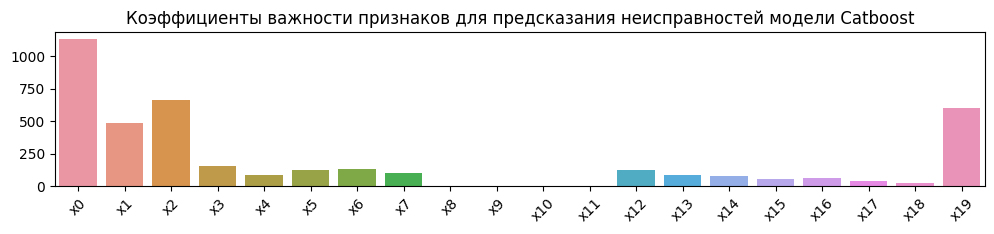

In [59]:
plot_feature_importance(profile_lgbm_pipe)

In [60]:
show_stat_results()

in


,step1,step2,presicion,recall,f1_score,test_size,model,addition
0,StandardScaler,CatBoostClassifier,0.924394,0.924394,0.924394,36743.0,NaN,NaN
1,StandartScaler,LGBMClassifier,0.923577,0.923577,0.923577,36743.0,NaN,NaN
2,StandardScaler,XGBClassifier,0.895273,0.895273,0.895273,36743.0,NaN,NaN
3,Normalizer,LGBMClassifier,0.913997,0.913997,0.913997,36743.0,NaN,NaN
4,StandardScaler,LGBMClassifier,0.923577,0.923577,0.923577,36743.0,NaN,NaN
...,...,...,...,...,...,...,...,...
80,StandardScaler,CatBoostClassifier,1.000000,1.000000,1.000000,71509.0,vertical,default settings
81,StandardScaler,LGBMClassifier,1.000000,1.000000,1.000000,71509.0,vertical,default settings
82,StandardScaler,XGBClassifier,1.000000,1.000000,1.000000,71509.0,side,n_estimators=500
83,StandardScaler,CatBoostClassifier,1.000000,1.000000,1.000000,71509.0,side,"lr:1.0,iter:500,depth:3"
